[**쇼핑몰 사이트 주문 데이터 분석하기**]

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
data  = pd.read_excel("./Online Retail.xlsx")

# EDA

- feature 타입 확인
- 결측치 확인 및 처리
- 새로운 feature 생성

**데이터 설명**  

- InvoiceNo:상품 주문 번호
- StockCode:상품 아이디
- Description:상품에 관한 설명  
- Quantity:상품 주문 수량
- InvoiceDate:상품 주문 날짜
- UnitPrice:상품 1개의 가격
- CustomerID:고객 아이디
- Country:고객이 거주하는 지역

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- CustomerID가 null인 데이터 있는데 고객 ID가 없으면 분석에 의미가 없기 때문에 제거하기로 결정
- Quantity, UnitPrice가 음수인 부분이 있는데 가격과 수량은 마이너스가 될 수 없기 때문에 음수인 부분도 제거하기로 결정

In [9]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
data = data[pd.notnull(data["CustomerID"])]

In [11]:
data = data[data["Quantity"]>0]
data = data[data["UnitPrice"]>0]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null float64
Country        397884 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


데이터가 잘 바뀐것을 확인하였다.

데이터에서 **최종 금액**에 관한 부분은 없다. 따라서 이와 관련된 변수를 추가하기로 결정

In [14]:
data["AllPrice"] = data["Quantity"]*data["UnitPrice"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AllPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


우수한 고객을 선별해 보자
우수 기준은??
많이 구매한??
자주 구매한??

상품에 따른 매출 분석
고객 분석
- 우수한 고객 선별하여 이벤트 마련?
- 고객 리텐션 분석

## 가장 큰 수익이 나온 국가는 어디일까?

In [59]:
country_revenue = data.groupby("Country").sum()["AllPrice"].sort_values(ascending=False)

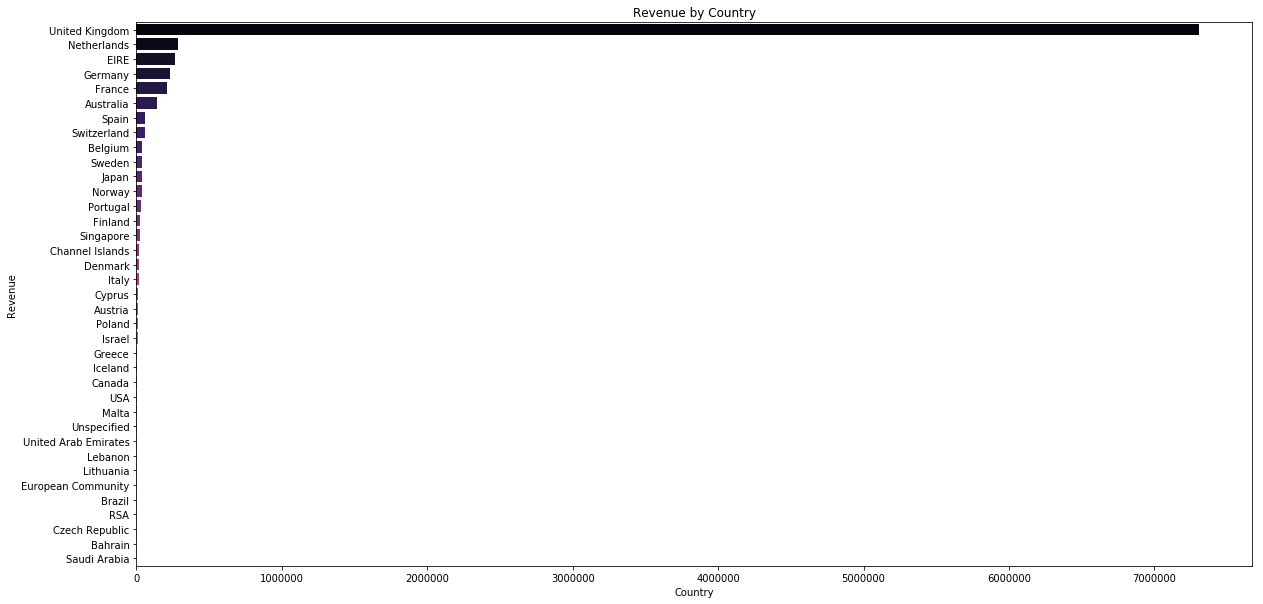

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = country_revenue.values, y = country_revenue.index, palette = 'magma')
plt.title('Revenue by Country')
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()

영국에서 가장 많은 주문이 일어난 것을 확인하였습니다.

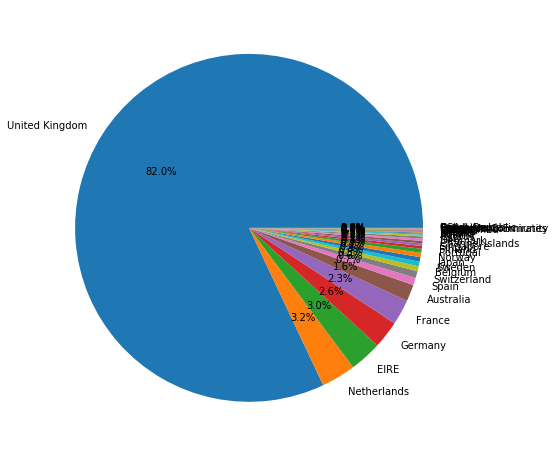

In [61]:
fig, ax = plt.subplots(figsize=(18,8))
from matplotlib import pyplot as plt
plt.pie(country_revenue.values, labels=country_revenue.index,autopct='%0.1f%%',)
plt.show()

영국은 약 82%를 차지합다.

영국이 너무 많은 비중을 차지해 다른 국가와의 차이를 파악하기 어렵기 때문에 영국을 제거하고 한번 더 확인해보도록 하겠습니다.

In [62]:
country_revenue = data.groupby("Country").sum()["AllPrice"].sort_values(ascending=False)[1:]

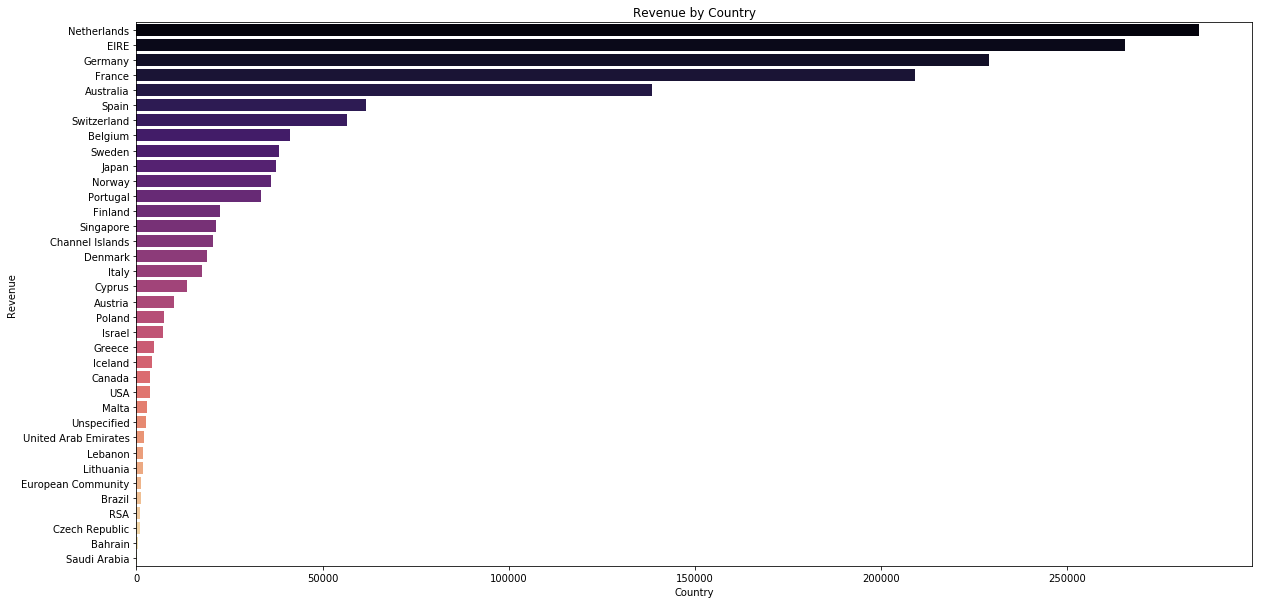

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = country_revenue.values, y = country_revenue.index, palette = 'magma')
plt.title('Revenue by Country')
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()

네덜란드, 아일랜드, 독일, 프랑스 등이 상위권을 차지하였습니다.

## 어느 달에 수익이 가장 많을까?

In [34]:
data['YearMonth'] = data['InvoiceDate'].map(lambda x: 100*x.year + x.month)

In [35]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AllPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012


In [36]:
Month_revenue = data.set_index("InvoiceDate").groupby("YearMonth").sum()['AllPrice']

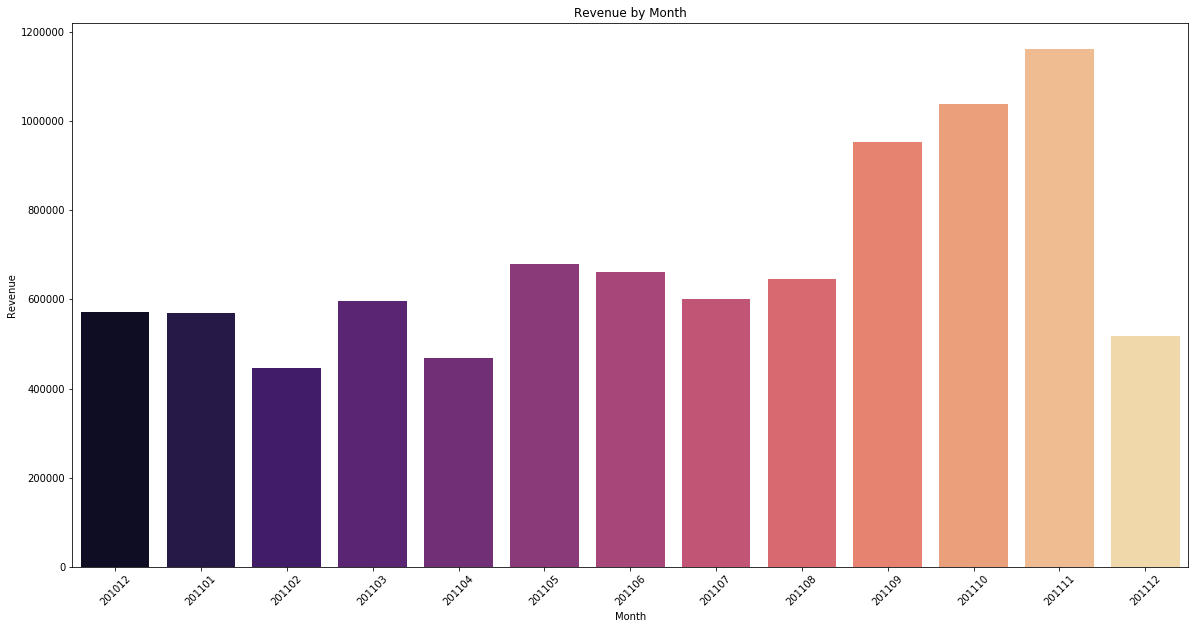

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = Month_revenue.index, y = Month_revenue.values, palette = 'magma')
plt.title('Revenue by Month')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [56]:
data["InvoiceDate"].sort_values(ascending=False)

541908   2011-12-09 12:50:00
541900   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541895   2011-12-09 12:50:00
541896   2011-12-09 12:50:00
541897   2011-12-09 12:50:00
541898   2011-12-09 12:50:00
541899   2011-12-09 12:50:00
541894   2011-12-09 12:50:00
541901   2011-12-09 12:50:00
541903   2011-12-09 12:50:00
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541902   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541893   2011-12-09 12:49:00
541892   2011-12-09 12:49:00
541891   2011-12-09 12:49:00
541890   2011-12-09 12:49:00
541873   2011-12-09 12:31:00
541876   2011-12-09 12:31:00
541875   2011-12-09 12:31:00
541874   2011-12-09 12:31:00
541869   2011-12-09 12:31:00
541872   2011-12-09 12:31:00
541871   2011-12-09 12:31:00
541870   2011-12-09 12:31:00
541878   2011-12-09 12:31:00
541877   2011-12-09 12:31:00
541887   2011-12-09 12:31:00
                 ...        
44       2010-12-01 08:45:00
40       2010-12-01 08:45:00
39       2010-12-01 08:45:00
38       2010-

12월에 주문이 없어 보이지만 데이터를 보면 가장 마지막 월이 9일임을 알 수 있다. 9일까지만 존재하는데 저 정도 양으로 봐서는 
12월이 가장 많을 수 있다고 짐작할 수 있다.

## 어느 요일에 수익이 가장 많을까?

In [57]:
week_revenue= data.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()["AllPrice"]
week_revenue

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: AllPrice, dtype: float64

In [58]:
week = np.array(["mon","Tue","Wen","Thur","Fri","sat","Sun"])
week_revenue.index = week[week_revenue.index]

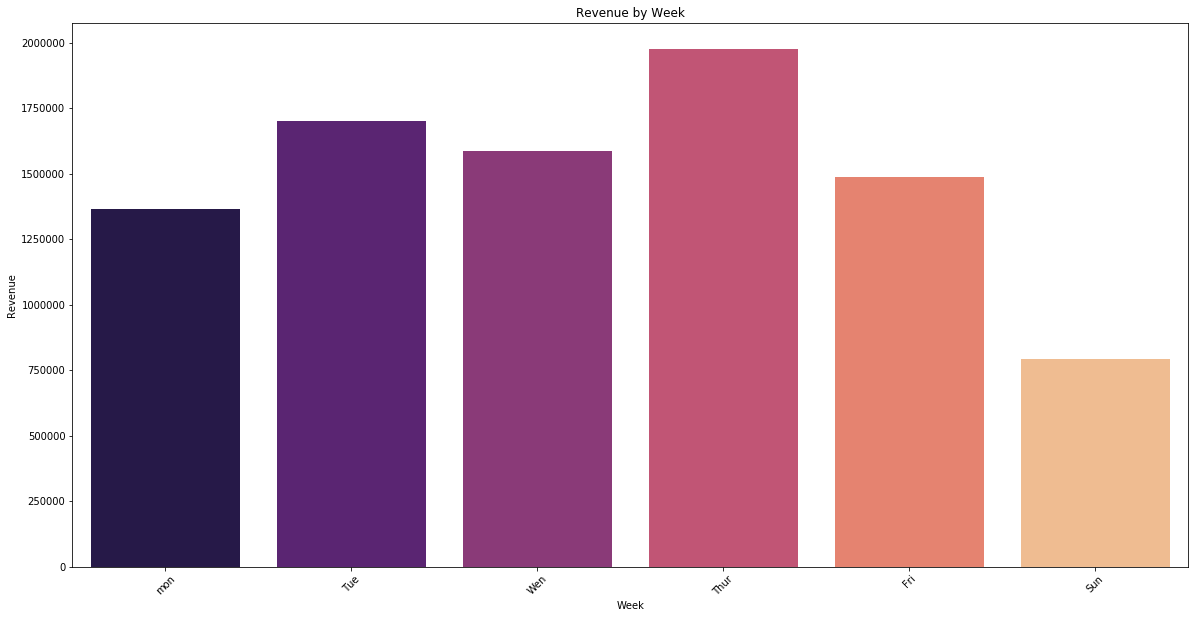

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = week_revenue.index, y = week_revenue.values, palette = 'magma')
plt.title('Revenue by Week')
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

목요일에 가장 수익이 높았다. 그래프를 보면 토요일이 존재하지 않는 것으로 보아 토요일은 문을 닫거나? 하는 것 같다.

## 가장 많이 팔린 상품은 무엇일까?

In [67]:
top_sell = data.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_sell

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

## 가장 많은 수익을 낸 상품은 무엇일까?

In [68]:
top_rev_evue = data.groupby('StockCode').sum()['AllPrice'].sort_values(ascending=False)[:10]
top_rev_evue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: AllPrice, dtype: float64

가장 많이 팔린 상품과 가장 많은 수익을 낸 상품에는 약간의 차이가 존재하는 것을 알 수 있다.

In [93]:
top3_sell = data.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]

In [96]:
top3_month = data.set_index("YearMonth").groupby(["StockCode","YearMonth"]).sum()[['Quantity','AllPrice']].loc[top3_sell.index]

In [97]:
top3_month

Quantity   AllPrice
StockCode YearMonth                     
23166     201101        74215   77183.60
          201105          792     869.04
          201106          391     458.51
          201107          718     826.94
          201108          405     486.09
          201109          342     397.26
          201110          235     283.67
          201111          631     708.11
          201112          187     203.51
23843     201112        80995  168469.60
84077     201012         5139    1150.47
          201101         1488     385.44
          201102         3457     795.17
          201103         3888     943.20
          201104        10224    2281.44
          201105         4944    1249.44
          201106         1920     533.76
          201107         3600     982.56
          201108         2256     654.24
          201109         3462     985.70
          201110         8174    1953.98
          201111         4500    1294.20
          201112         1363     376.65

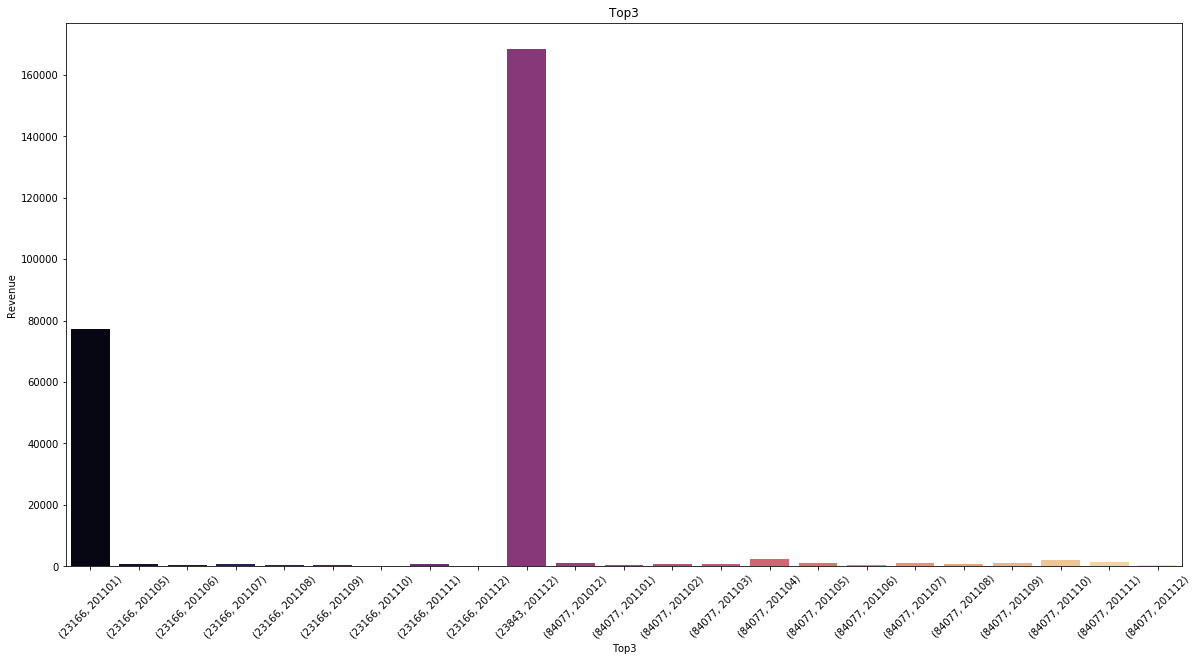

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = top3_month["AllPrice"].index, y =top3_month["AllPrice"].values, palette = 'magma')
plt.title('Top3')
plt.xlabel("Top3")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

Top3 상품을 월별로 살펴보면 계절성이 나타나는 것을 알 수 있다. 따라서 23166은 주로 겨울에 쓰는 상품으로 예측해 볼 수 있다.

In [100]:
data[data["StockCode"]==23166].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AllPrice,YearMonth
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,201101
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-05-12 10:10:00,1.04,14646.0,Netherlands,99.84,201105
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-05-12 12:11:00,1.25,16745.0,United Kingdom,5.00,201105
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2011-05-12 16:29:00,1.25,14651.0,United Kingdom,6.25,201105
187868,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,2011-05-12 16:52:00,1.25,13601.0,United Kingdom,3.75,201105


# 리마케팅을 위한 코호트 분석 재구매 기간을 알아보자!

마케팅에서는 신규 고객을 확보하는 것도 중요하지만 **기존 고객을 유지**하는것 또한 중요한 일이다. 이를 위해 마케팅에서는 리마케팅(특정 제품을 재구매 또는 사이트를 재방문)을 현업에서 많이 활용한다. 리마케팅을 하기 위해서 코호트 분석을 통해 특정기간 간 고객들의 행동패턴을 알아보고자 한다.

사용자가 처음 구매한 날을 알아보자(월 기준)

In [169]:
def month(date):
    return datetime(date.year,date.month,1)

data["Month"] = data["InvoiceDate"].apply(month)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AllPrice,YearMonth,Month,buy_start,Month_pass
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,201012,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,201012,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01,2010-12-01,0


In [170]:
month_group = data.groupby("CustomerID")['Month']
data['buy_start'] = month_group.transform(np.min)

In [171]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AllPrice,YearMonth,Month,buy_start,Month_pass
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,201112,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,201112,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,201112,2011-12-01,2011-08-01,4


사용자가 처음 구매한 날로 부터 다음 상품을 구매하기까지 기간

In [172]:
data['Month_pass'] = (data["Month"].dt.year-data["buy_start"].dt.year)*12 + \
    (data["Month"].dt.month-data["buy_start"].dt.month)

In [173]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AllPrice,YearMonth,Month,buy_start,Month_pass
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,201112,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,201112,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,201112,2011-12-01,2011-08-01,4


In [174]:
cohort = data.groupby(["buy_start",'Month_pass'])

In [175]:
def get_unique_no(x):
  #  print(x)
    return len(np.unique(x))

In [176]:
coho_df = cohort["CustomerID"].apply(lambda x: len(np.unique(x))).reset_index()

In [177]:
coho_df.head()

,buy_start,Month_pass,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [178]:
coho_df = coho_df.pivot(index= "buy_start",columns='Month_pass')
coho_df.head()

CustomerID                                                          \
Month_pass         0      1      2      3      4      5      6      7      8    
buy_start                                                                       
2010-12-01      885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0  313.0   
2011-01-01      417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0  125.0   
2011-02-01      380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   94.0   
2011-03-01      452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0  126.0   
2011-04-01      300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   22.0   

                                        
Month_pass     9      10     11     12  
buy_start                               
2010-12-01  350.0  331.0  445.0  235.0  
2011-01-01  136.0  152.0   49.0    NaN  
2011-02-01  116.0   26.0    NaN    NaN  
2011-03-01   39.0    NaN    NaN    NaN  
2011-04-01    NaN    NaN    NaN    NaN

In [131]:
coho_customer = coho_df.div(coho_df.iloc[:,0],axis=0) * 100
coho_customer

CustomerID                                                         \
Month_pass         0          1          2          3          4          5    
buy_start                                                                      
2010-12-01      100.0  36.610169  32.316384  38.418079  36.271186  39.774011   
2011-01-01      100.0  22.062350  26.618705  23.021583  32.134293  28.776978   
2011-02-01      100.0  18.684211  18.684211  28.421053  27.105263  24.736842   
2011-03-01      100.0  15.044248  25.221239  19.911504  22.345133  16.814159   
2011-04-01      100.0  21.333333  20.333333  21.000000  19.666667  22.666667   
2011-05-01      100.0  19.014085  17.253521  17.253521  20.774648  23.239437   
2011-06-01      100.0  17.355372  15.702479  26.446281  23.140496  33.471074   
2011-07-01      100.0  18.085106  20.744681  22.340426  27.127660  11.170213   
2011-08-01      100.0  20.710059  24.852071  24.260355  12.426036        NaN   
2011-09-01      100.0  23.411371  30.100334  11.371237        NaN        NaN   
2011-10-01      100.0  24.022346  11.452514        NaN        NaN        NaN   
2011-11-01      100.0  11.145511        NaN        NaN        NaN        NaN   
2011-12-01      100.0        NaN        NaN        NaN        NaN        NaN   

                                                                              \
Month_pass         6          7          8          9          10         11   
buy_start                                                                      
2010-12-01  36.271186  34.915254  35.367232  39.548023  37.401130  50.282486   
2011-01-01  24.700240  24.220624  29.976019  32.613909  36.450839  11.750600   
2011-02-01  25.263158  27.894737  24.736842  30.526316   6.842105        NaN   
2011-03-01  26.769912  23.008850  27.876106   8.628319        NaN        NaN   
2011-04-01  21.666667  26.000000   7.333333        NaN        NaN        NaN   
2011-05-01  26.408451   9.507042        NaN        NaN        NaN        NaN   
2011-06-01   9.504132        NaN        NaN        NaN        NaN        NaN   
2011-07-01        NaN        NaN        NaN        NaN        NaN        NaN   
2011-08-01        NaN        NaN        NaN        NaN        NaN        NaN   
2011-09-01        NaN        NaN        NaN        NaN        NaN        NaN   
2011-10-01        NaN        NaN        NaN        NaN        NaN        NaN   
2011-11-01        NaN        NaN        NaN        NaN        NaN        NaN   
2011-12-01        NaN        NaN        NaN        NaN        NaN        NaN   

                       
Month_pass         12  
buy_start              
2010-12-01  26.553672  
2011-01-01        NaN  
2011-02-01        NaN  
2011-03-01        NaN  
2011-04-01        NaN  
2011-05-01        NaN  
2011-06-01        NaN  
2011-07-01        NaN  
2011-08-01        NaN  
2011-09-01        NaN  
2011-10-01        NaN  
2011-11-01        NaN  
2011-12-01        NaN

In [179]:
coho_customer = coho_customer.round(decimals=2)

In [180]:
coho_customer

CustomerID                                                          \
Month_pass         0      1      2      3      4      5      6      7      8    
buy_start                                                                       
2010-12-01      100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92  35.37   
2011-01-01      100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22  29.98   
2011-02-01      100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89  24.74   
2011-03-01      100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01  27.88   
2011-04-01      100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   7.33   
2011-05-01      100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51    NaN   
2011-06-01      100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN    NaN   
2011-07-01      100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN    NaN   
2011-08-01      100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN    NaN   
2011-09-01      100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN    NaN   
2011-10-01      100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01      100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01      100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                        
Month_pass     9      10     11     12  
buy_start                               
2010-12-01  39.55  37.40  50.28  26.55  
2011-01-01  32.61  36.45  11.75    NaN  
2011-02-01  30.53   6.84    NaN    NaN  
2011-03-01   8.63    NaN    NaN    NaN  
2011-04-01    NaN    NaN    NaN    NaN  
2011-05-01    NaN    NaN    NaN    NaN  
2011-06-01    NaN    NaN    NaN    NaN  
2011-07-01    NaN    NaN    NaN    NaN  
2011-08-01    NaN    NaN    NaN    NaN  
2011-09-01    NaN    NaN    NaN    NaN  
2011-10-01    NaN    NaN    NaN    NaN  
2011-11-01    NaN    NaN    NaN    NaN  
2011-12-01    NaN    NaN    NaN    NaN

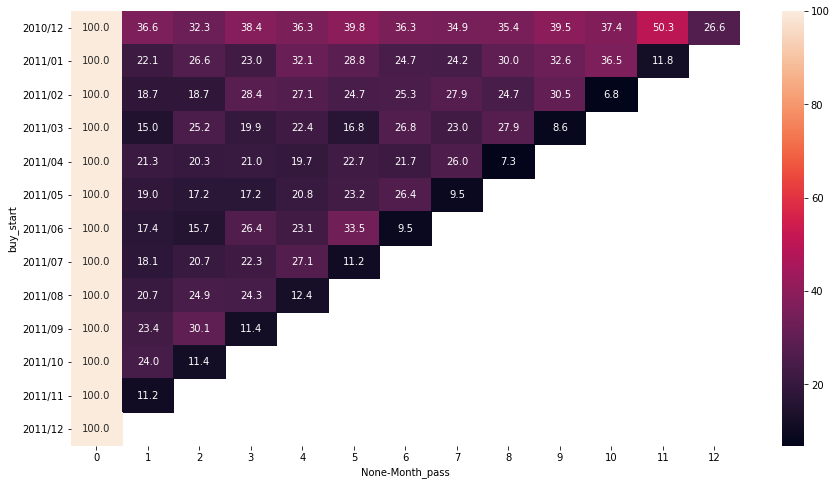

In [181]:
x = np.arange(0,13)
y = ['2010/12','2011/01','2011/02','2011/03','2011/04','2011/05','2011/06','2011/07','2011/08','2011/09','2011/10','2011/11','2011/12']

plt.figure(figsize=(15,8))
sns.heatmap(coho_customer,
           annot=True,
           xticklabels=x,
           yticklabels=y,
           fmt='.1f')

# 쿠폰 증정 이벤트

쿠폰을 증정하는 이벤트를 진행하려고 한다. 어느 시간에 쿠폰을 발송해야 할까?
- 자기 전에 쇼핑을 많이 할까?
- 점심시간에 쇼핑을 많이 할까?
- 저녁시간에 쇼핑을 많이 할까?

In [136]:
order_hour=data.set_index('InvoiceDate').groupby(lambda date: date.hour).count()['CustomerID']
order_hour

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

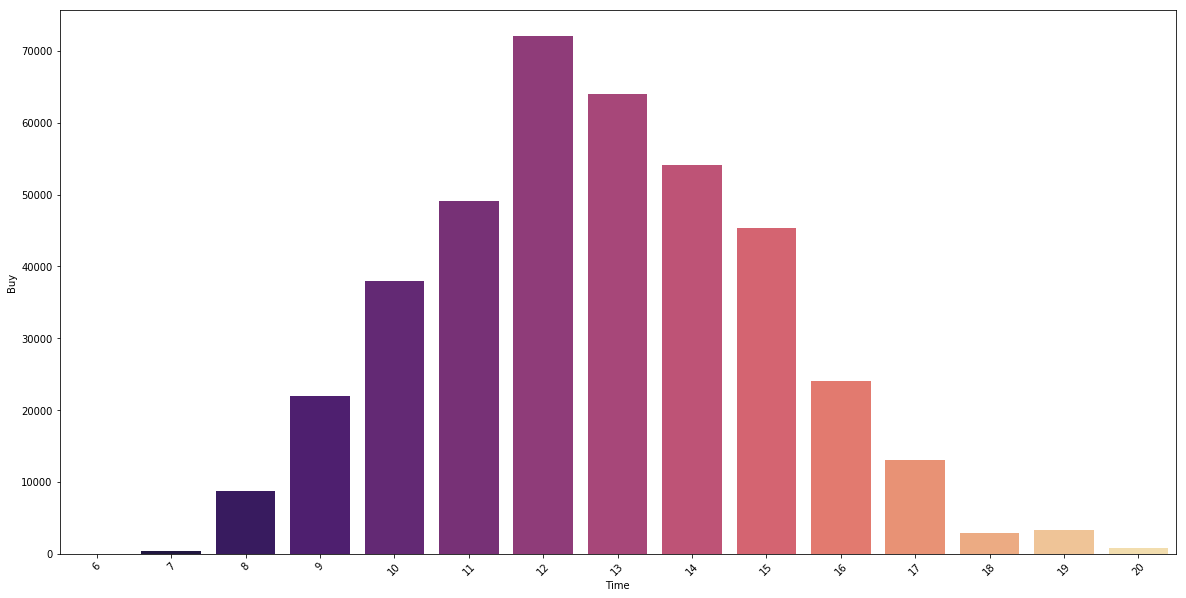

In [159]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = order_hour.index, y = order_hour.values, palette = 'magma')
plt.xlabel("Time")
plt.ylabel("Buy")
plt.xticks(rotation=45)
plt.show()

분석 결과 **12시~13시** 주로 점심시간에 고객들이 활발하게 구매 활동을 하는 것을 알 수 있다. 이 시간대를 활용하여 점심시간에 쿠폰을 발송하면 마케팅 효과가 더 크게 나타날 것이다.

조금 더 세부적으로 분석해서 고객별로 쿠폰 발송 시간을 다르게 한다면??

In [163]:
customer_time = data.set_index("InvoiceDate").groupby(['CustomerID',lambda date:date.hour]).count()['StockCode']
customer_time

CustomerID    
12346.0     10      1
12347.0     8      22
            10     24
            12     47
            13     18
            14     60
            15     11
12348.0     10     11
            13      3
            19     17
12349.0     9      73
12350.0     16     17
12352.0     12     15
            14     52
            15      3
            16     15
12353.0     17      4
12354.0     13     58
12355.0     13     13
12356.0     8       2
            9      36
            12     21
12357.0     16    131
12358.0     10     19
12359.0     12    168
            14     80
12360.0     9      45
            10     30
            15     54
12361.0     13     10
                 ... 
18265.0     15     29
18268.0     19      1
18269.0     13      7
18270.0     12      5
            13      6
18272.0     9      33
            11     29
            12     45
            15     37
            18     22
18273.0     11      2
            13      1
18274.0     17     11
18276.0     10   

18272 고객에 대한 쿠폰 발송시간을 정해보자

In [165]:
max_time = order_count.groupby("CustomerID").idxmax() # 고객이 가장 많이 구매한 시간 구하기

In [166]:
max_time = order_count.loc[max_time].head()

In [168]:
max_time.head()

CustomerID    
12346.0     10     1
12347.0     14    60
12348.0     19    17
12349.0     9     73
12350.0     16    17
Name: StockCode, dtype: int64

12347 고객은 14시, 12348고객은 19시에 쿠폰을 발송하면 더 효과적으로 마케팅을 할 수 있다.